# Project: Wrangling and Analyze Data

## Introduction

Real-world data rarely comes clean. Using Python and its libraries, We will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. The wrangling wffoets will be documentated and showcased through analyses and visualizations using Python (and its libraries).

The dataset that will be wrangled (and analyzed and visualized) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

Three sets of data will be used for this project.

1. twitter_archive_enhanced.csv provided by udacity
2. image_predictions.tsv hosted on udacity servers, should be downloaded programmatically using the request library
3. Additional data from the twitter api
   >Gather each tweet's retweet count and favorite ("like") count at the minimum and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

    >Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame     with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.


In [71]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import tweepy
import requests
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode= 'wb') as file:
    file.write(response.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
if os.path.isfile('tweet_json.txt'):
    print("The dataset has been downloaded already and written into the tweet_json.txt file.")
else:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

    consumer_key =   'YOUR CONSUMER KEY'
    consumer_secret =    'YOUR CONSUMER SECRET'
    access_token =  'YOUR ACCESS TOKEN'
    access_secret =   'YOUR ACCESS SECRET'

    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
    tweet_ids = tw_arc.tweet_id.values
    len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

The dataset has been downloaded already and written into the tweet_json.txt file.


In [5]:
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))
#print out one json object for further reference 
tweets[0]     

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [6]:
#creat a list of data from tweet_json.txt
list_twits = []
for json_data in tweets:
    list_twits.append({'id' : json_data['id'],
                       'retweet_count': int(json_data['retweet_count']),
                       'favorite_count' : int(json_data['favorite_count'])})
   
#creat a Dataframe
tweets_api = pd.DataFrame(list_twits, columns = ['id', 'retweet_count' , 'favorite_count']) 
#Check out the obatined DataFrame
tweets_api.head() 

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assesing Twitter Achaive data

In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archive.shape

(2356, 17)

In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
sum(twitter_archive.duplicated())

0

In [12]:
twitter_archive[pd.isnull(twitter_archive.retweeted_status_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1807,676916996760600576,NaN,NaN,2015-12-16 00:09:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Super speedy pupper. Does not go gentle into t...,NaN,NaN,NaN,https://vine.co/v/imJ0BdZOJTw,10,10,None,None,None,pupper,None
1462,694905863685980160,NaN,NaN,2016-02-03 15:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He's a Bisquick Taj Mapaw. Too...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694905863...,10,10,Archie,None,None,None,None
1943,673709992831262724,NaN,NaN,2015-12-07 03:45:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know a lot of you are studying for finals. G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673709992...,12,10,None,None,None,None,None
1882,674999807681908736,6.747934e+17,4.196984e+09,2015-12-10 17:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ok last one of these. I may try to make some m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674999807...,13,10,None,None,None,None,None
1496,692530551048294401,NaN,NaN,2016-01-28 02:12:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cody. He's been to like 80 countr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692530551...,10,10,Cody,None,None,None,None
1483,693262851218264065,NaN,NaN,2016-01-30 02:41:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I hope you guys enjoy this beautiful snowy pup...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693262851...,11,10,None,None,None,pupper,None
785,775085132600442880,NaN,NaN,2016-09-11 21:34:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He would like a hug. 13/10 som...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775085132...,13,10,Tucker,None,None,None,None
571,801538201127157760,NaN,NaN,2016-11-23 21:29:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. He'll be your chau-fur this e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801538201...,12,10,Wallace,None,None,None,None
1784,677662372920729601,NaN,NaN,2015-12-18 01:31:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",In honor of the new Star Wars movie. Here's Yo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677662372...,12,10,None,None,None,None,None
1365,702684942141153280,NaN,NaN,2016-02-25 02:42:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's sick of these bullshit gen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702684942...,11,10,Lucy,None,None,None,None


In [14]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
twitter_archive.name.value_counts().head(15)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Name: name, dtype: int64

In [16]:
twitter_archive.loc[twitter_archive.rating_denominator != 10].count()[0]

23

In [17]:
twitter_archive.loc[twitter_archive.rating_numerator < 10].count()[0]

440

### Assessing Tweet Image Prediction

In [18]:
image_predictions= pd.read_csv('image_predictions.tsv', sep= '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
image_predictions.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
88,667530908589760512,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,1,golden_retriever,0.633037,True,kuvasz,0.146391,True,Labrador_retriever,0.046184,True
230,670408998013820928,https://pbs.twimg.com/media/CU3FbQgVAAACdCQ.jpg,1,ping-pong_ball,0.999945,False,tennis_ball,0.000018,False,racket,0.000015,False
68,667182792070062081,https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg,1,golden_retriever,0.949892,True,Irish_setter,0.010564,True,Chesapeake_Bay_retriever,0.005821,True
832,693647888581312512,https://pbs.twimg.com/media/CaBVE80WAAA8sGk.jpg,1,washbasin,0.272451,False,doormat,0.165871,False,bathtub,0.066368,False
217,670069087419133954,https://pbs.twimg.com/media/CUyQRzHWoAAhF1D.jpg,1,boathouse,0.313829,False,birdhouse,0.138331,False,ashcan,0.045673,False
822,693109034023534592,https://pbs.twimg.com/ext_tw_video_thumb/69310...,1,cocker_spaniel,0.740013,True,Welsh_springer_spaniel,0.088739,True,golden_retriever,0.047470,True
1842,838476387338051585,https://pbs.twimg.com/media/C6Ld0wYWgAQQqMC.jpg,3,Great_Pyrenees,0.997692,True,kuvasz,0.001001,True,Newfoundland,0.000405,True
573,678424312106393600,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1,Maltese_dog,0.759945,True,toy_poodle,0.101194,True,Shih-Tzu,0.056037,True
1850,840268004936019968,https://pbs.twimg.com/media/C6k7SaEXUAg83_J.jpg,3,Chesapeake_Bay_retriever,0.863987,True,Labrador_retriever,0.052632,True,kelpie,0.032574,True
1495,783347506784731136,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True


In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Assessing Twitter Data From API

In [22]:
tweets_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [23]:
tweets_api.sample(10)

,id,retweet_count,favorite_count
497,813130366689148928,513,4968
594,798701998996647937,9126,0
87,875097192612077568,6342,27997
1973,672997845381865473,786,2092
2036,671550332464455680,229,967
2166,669354382627049472,1390,2889
881,760252756032651264,995,4338
1187,718246886998687744,565,2115
771,776477788987613185,3249,9858
1632,684225744407494656,239,1369


In [24]:
tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
twitter_archive
- Missing values(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)    

- Invalid timestamp datatype(object instead of datetime)

- Invalid tweet_id datatype( integer instead of object)

- name column has invalid names namely: None

- Rating denominators not equal 10

- Rows with retweets


Image prediction
- Naming not consistent in p1,p2,p3 (Other names start with capital letters, while others with small letters)
- Underscores used instead of spaces for multi-word naming
- Invalid tweet_id datatype

Tweets_api
- Invalid id datatype( integer instead of object)

### Tidiness issues
- three different dataframes

- four colums(doggo", "flooter", "pupper", "puppo") which can be categorized into one

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

## Quality

In [25]:
# Make copies of original pieces of data
clean_twitter_arc= twitter_archive.copy()
clean_image = image_predictions.copy()
clean_tweets_ap = tweets_api.copy()

### Rows with retweets

#### Define

Delete rows with retweets

#### Code

In [26]:
retweets_index = list(clean_twitter_arc[clean_twitter_arc["retweeted_status_id"].isnull()==False].index)
retweets_index

[19,
 32,
 36,
 68,
 73,
 74,
 78,
 91,
 95,
 97,
 101,
 109,
 118,
 124,
 130,
 132,
 137,
 146,
 155,
 159,
 160,
 165,
 171,
 180,
 182,
 185,
 194,
 195,
 204,
 211,
 212,
 222,
 230,
 231,
 247,
 250,
 260,
 266,
 272,
 273,
 281,
 285,
 286,
 289,
 298,
 302,
 303,
 307,
 309,
 310,
 319,
 327,
 332,
 340,
 341,
 343,
 357,
 359,
 366,
 382,
 386,
 397,
 399,
 406,
 411,
 415,
 420,
 422,
 425,
 431,
 434,
 435,
 438,
 446,
 447,
 450,
 453,
 455,
 462,
 465,
 469,
 475,
 476,
 479,
 485,
 488,
 506,
 522,
 530,
 535,
 538,
 541,
 543,
 546,
 552,
 555,
 558,
 561,
 566,
 568,
 574,
 577,
 581,
 583,
 586,
 589,
 594,
 595,
 596,
 597,
 598,
 599,
 600,
 601,
 602,
 603,
 604,
 605,
 606,
 612,
 615,
 618,
 627,
 629,
 634,
 654,
 655,
 656,
 661,
 664,
 669,
 671,
 677,
 682,
 686,
 692,
 694,
 702,
 720,
 728,
 741,
 742,
 745,
 749,
 753,
 759,
 764,
 767,
 770,
 773,
 778,
 784,
 794,
 800,
 811,
 815,
 818,
 822,
 826,
 829,
 833,
 841,
 847,
 860,
 868,
 872,
 885,
 890,
 8

In [27]:
clean_twitter_arc.drop(axis=0, index=retweets_index, inplace=True)

#### test

In [28]:
for retweet in retweets_index:
    if retweet in list(clean_twitter_arc.index):
        print('Found a retweet')

### Missing Data:

#### Define:

Drop columns with missing values

#### Code

In [29]:
clean_twitter_arc.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id','expanded_urls'], axis =1, inplace=True )

#### Test

In [30]:
clean_twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Invalid timestamp datatype(object instead of datetime):

#### Define

Change the timestamp column datatype from string to datetime

#### Code

In [31]:
clean_twitter_arc.timestamp = clean_twitter_arc.timestamp.astype('datetime64')

#### Test

In [32]:
clean_twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   rating_numerator    2175 non-null   int64         
 5   rating_denominator  2175 non-null   int64         
 6   name                2175 non-null   object        
 7   doggo               2175 non-null   object        
 8   floofer             2175 non-null   object        
 9   pupper              2175 non-null   object        
 10  puppo               2175 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 203.9+ KB


### Invalid tweet_id datatype( integer instead of object):

#### Define

Convert tweet_id datatype from integer to a string

#### Code

In [33]:
clean_twitter_arc.tweet_id =clean_twitter_arc.tweet_id.astype(str)

#### Test

In [34]:
clean_twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   rating_numerator    2175 non-null   int64         
 5   rating_denominator  2175 non-null   int64         
 6   name                2175 non-null   object        
 7   doggo               2175 non-null   object        
 8   floofer             2175 non-null   object        
 9   pupper              2175 non-null   object        
 10  puppo               2175 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 203.9+ KB


### Name column has invalid names namely: None

#### Define

covert the the names written None to NaN

#### Code

In [35]:
clean_twitter_arc.name.replace(['None'], np.nan, inplace=True)

#### Test

In [36]:
clean_twitter_arc.name.value_counts()

a             55
Charlie       11
Lucy          11
Oliver        10
Cooper        10
              ..
Wishes         1
Rose           1
Theo           1
Fido           1
Christoper     1
Name: name, Length: 955, dtype: int64

### Rating denominators not equal 10

#### Define

drop rows with rating denominator that is not equal to 10

#### Code

In [37]:
not_equal_ten = list(clean_twitter_arc.query("rating_denominator != 10").index)
clean_twitter_arc.drop(index=not_equal_ten, inplace=True)

#### Test

In [38]:
clean_twitter_arc.rating_denominator.value_counts()

10    2153
Name: rating_denominator, dtype: int64

### Names start with small letters

#### Define

Correct inconsistencies by Capitalizing the first Letter of the names

#### Code

In [39]:
clean_image.p1 = clean_image.p1.str.title()
clean_image.p2 =clean_image.p2.str.title()
clean_image.p3 = clean_image.p3.str.title()

#### Test

In [40]:
clean_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1748,823581115634085888,https://pbs.twimg.com/media/C23ypm6VQAAO31l.jpg,1,Dingo,0.280949,False,German_Shepherd,0.194044,True,Pembroke,0.120051,True
592,679462823135686656,https://pbs.twimg.com/media/CW3v1KxW8AAIOuy.jpg,1,Toy_Poodle,0.621780,True,Miniature_Poodle,0.197819,True,Soft-Coated_Wheaten_Terrier,0.046745,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_Mastiff,0.506312,True,Tibetan_Terrier,0.295690,True,Otterhound,0.036251,True
1025,710658690886586372,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,Soft-Coated_Wheaten_Terrier,0.948617,True,Dandie_Dinmont,0.018664,True,Cairn,0.015943,True
752,688116655151435777,https://pbs.twimg.com/media/CYyucekVAAESj8K.jpg,1,Pug,0.973819,True,Chihuahua,0.010891,True,Staffordshire_Bullterrier,0.006864,True
1697,816697700272001025,https://pbs.twimg.com/media/C1V-K63UAAEUHqw.jpg,1,Chihuahua,0.756992,True,Pomeranian,0.052850,True,Maltese_Dog,0.047608,True
554,677644091929329666,https://pbs.twimg.com/ext_tw_video_thumb/67764...,1,Chihuahua,0.626236,True,Italian_Greyhound,0.128483,True,Swing,0.059840,False
181,669328503091937280,https://pbs.twimg.com/media/CUnuuLEWEAAlKjN.jpg,1,Siberian_Husky,0.424202,True,Eskimo_Dog,0.237660,True,Malamute,0.052572,True
766,689154315265683456,https://pbs.twimg.com/media/CZBeMMVUwAEdVqI.jpg,1,Cocker_Spaniel,0.816044,True,Golden_Retriever,0.054135,True,Airedale,0.030648,True
1026,710833117892898816,https://pbs.twimg.com/media/Cd1i8qvUkAE-Jlr.jpg,1,Pembroke,0.803742,True,Cardigan,0.189712,True,German_Shepherd,0.001746,True


### Naming Incosistencies

#### Define:

Replace the underscores that seperated naames with spaces

#### Code

In [41]:
clean_image.p1 = clean_image.p1.str.replace("_", " ")
clean_image.p2 = clean_image.p2.str.replace("_", " ")
clean_image.p3 = clean_image.p3.str.replace("_", " ")

#### Test

In [42]:
clean_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Tidiness

### four colums(doggo", "flooter", "pupper", "puppo") which can be categorized into one

#### Define

Create a new column (dog_stage) and extract dog stages into new column

#### Code

In [43]:
clean_twitter_arc['dog_stage'] =clean_twitter_arc["text"].str.extract('(doggo|floofer|pupper|puppo)')

#### Test

In [44]:
clean_twitter_arc.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,NaN


### three columns still exists after adding to dog stage column

#### Define

Drop three columns after adding them into the dog stage column

#### Code

In [45]:
#drop unneeded columns
clean_twitter_arc.drop(columns= ['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)

#### Test

In [46]:
clean_twitter_arc.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


### Null values in new dog stage column

#### Define

drop the null values

#### Code

In [47]:
clean_twitter_arc.dropna(subset=['dog_stage'], inplace = True)

#### Test

In [48]:
clean_twitter_arc.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo
12,889665388333682689,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,13,10,NaN,puppo
14,889531135344209921,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,13,10,Stuart,puppo
29,886366144734445568,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,12,10,Roscoe,pupper
43,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo


In [49]:
clean_twitter_arc.dog_stage.value_counts()

pupper     238
doggo       83
puppo       32
floofer      4
Name: dog_stage, dtype: int64

### Merge Datasets

#### Define

Merge the clean_twitter_arch and clean_tweets_ap datasets

#### Code

In [50]:
clean_tweets_ap.id =clean_tweets_ap.id.astype(str)

In [51]:
clean_twitter_1 = clean_twitter_arc.merge(clean_tweets_ap, left_on='tweet_id', right_on='id')

#### test

In [52]:
clean_twitter_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 356
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            357 non-null    object        
 1   timestamp           357 non-null    datetime64[ns]
 2   source              357 non-null    object        
 3   text                357 non-null    object        
 4   rating_numerator    357 non-null    int64         
 5   rating_denominator  357 non-null    int64         
 6   name                202 non-null    object        
 7   dog_stage           357 non-null    object        
 8   id                  357 non-null    object        
 9   retweet_count       357 non-null    int64         
 10  favorite_count      357 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 33.5+ KB


### Name column contains null values

#### Define

Drop the name column

#### Code

In [53]:
clean_twitter_1.drop('name', axis =1, inplace= True)

#### test

In [54]:
clean_twitter_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 356
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            357 non-null    object        
 1   timestamp           357 non-null    datetime64[ns]
 2   source              357 non-null    object        
 3   text                357 non-null    object        
 4   rating_numerator    357 non-null    int64         
 5   rating_denominator  357 non-null    int64         
 6   dog_stage           357 non-null    object        
 7   id                  357 non-null    object        
 8   retweet_count       357 non-null    int64         
 9   favorite_count      357 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 30.7+ KB


#### Define

Merge the new clean_twitter_1 and the clean image dataset

#### Code

In [55]:
clean_image.tweet_id =clean_image.tweet_id.astype(str)

In [56]:
twitter_archive_master1 = clean_twitter_1.merge(clean_image, left_on='tweet_id', right_on='tweet_id')

#### Test

In [57]:
twitter_archive_master1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 0 to 318
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            319 non-null    object        
 1   timestamp           319 non-null    datetime64[ns]
 2   source              319 non-null    object        
 3   text                319 non-null    object        
 4   rating_numerator    319 non-null    int64         
 5   rating_denominator  319 non-null    int64         
 6   dog_stage           319 non-null    object        
 7   id                  319 non-null    object        
 8   retweet_count       319 non-null    int64         
 9   favorite_count      319 non-null    int64         
 10  jpg_url             319 non-null    object        
 11  img_num             319 non-null    int64         
 12  p1                  319 non-null    object        
 13  p1_conf             319 non-null    float64       

#### Define

drop columns unecessary columns

In [58]:
twitter_archive_master1.drop(columns=['source','text','id','jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

#### test

In [59]:
twitter_archive_master1.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,dog_stage,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51,14,10,doggo,7711,32467
1,889665388333682689,2017-07-25 01:55:32,13,10,puppo,8538,38818
2,889531135344209921,2017-07-24 17:02:04,13,10,puppo,2321,15359
3,886366144734445568,2017-07-15 23:25:31,12,10,pupper,3316,21524
4,884162670584377345,2017-07-09 21:29:42,12,10,doggo,3128,20771


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [60]:
twitter_archive_master1.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [61]:
twitter_archive_master =pd.read_csv('twitter_archive_master.csv')

In [62]:
twitter_archive_master.groupby(['dog_stage'])[['tweet_id']].count()

,tweet_id
dog_stage,
doggo,71
floofer,3
pupper,217
puppo,28


In [63]:
correlation = twitter_archive_master['retweet_count'].corr(twitter_archive_master['favorite_count'])

In [64]:
correlation

0.9193004791856484

### Insights:
1. The pupper stage has the highest number of dogs  of 217

2. The floofer has the lowest number of dogs being 3

3. The correlation between retweets and favorie is a strong positive linear correlation (one variable increases with the increase in another variable) of about 0.92.

### Visualization

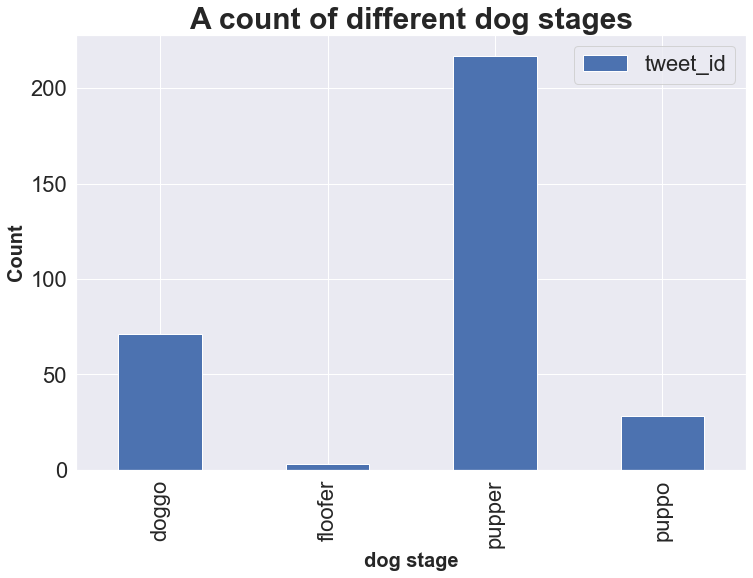

In [73]:
sns.set(font_scale=2)
twitter_archive_master.groupby(['dog_stage'])[['tweet_id']].count().plot(kind="bar", figsize=(12,8));
plt.ylabel("Count", weight='bold', fontsize=20)
plt.xlabel("dog stage", weight='bold', fontsize=20)
plt.title("A count of different dog stages", weight='bold', fontsize=30);

As can be seen above the puppers were the most popular dogs.

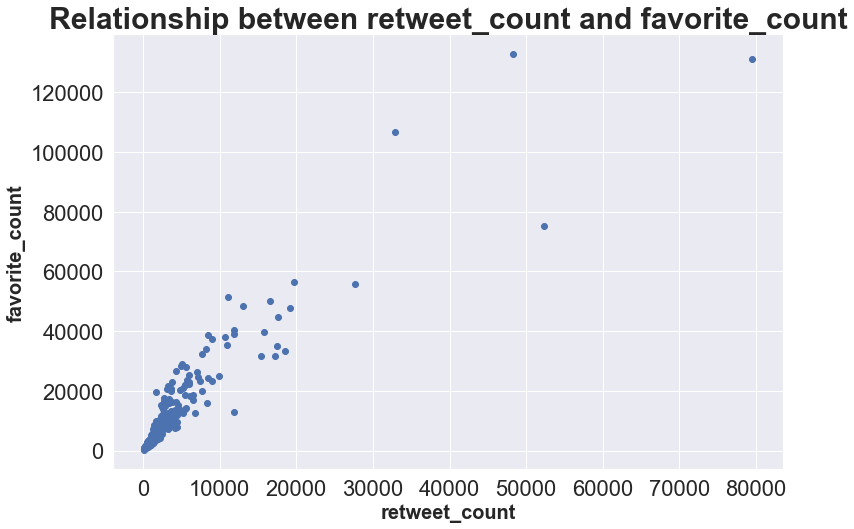

In [75]:
plt.subplots(figsize=(12,8))
sns.set(font_scale=2)
plt.scatter(twitter_archive_master.retweet_count, twitter_archive_master.favorite_count)
plt.title('Relationship between retweet_count and favorite_count', weight='bold',fontsize=30)
plt.xlabel('retweet_count', weight='bold', fontsize=20)
plt.ylabel('favorite_count', weight='bold', fontsize=20);

- There is positive strong correlation between favourite counts and the retweet counts.
- As retweet count increases, so do the favorite count.